# Conditions when one can assume steady state in the shell

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
import os, traceback, sys, h5py

In [2]:
plt.rcParams.update({'font.size': 20})

%config InlineBackend.figure_format='retina'

### Importing the code + PyPackage locally

In [3]:
sys.path.append('/Users/ajinkyakulkarni/Desktop/GitHub/py-pde')
import pde

sys.path.append('/Users/ajinkyakulkarni/Desktop/GitHub/py-droplets')
import droplets

sys.path.append('/Users/ajinkyakulkarni/Desktop/GitHub/py-phasesep')
import phasesep

sys.path.append('/Users/ajinkyakulkarni/Desktop/GitHub/agent-based-emulsions')
import agent_based

######################################################################################################################

In [4]:
k = 1e-2

A = 0 * k

D = 1e4 * k

R = 20

L = 100

In [5]:
A, D, k

(0.0, 100.0, 0.01)

In [6]:
xeta = np.sqrt(D/k)

xeta

100.0

In [7]:
timescale_k = (1/k)

timescale_diffusivity = (L**2 / D)

timescale_k, timescale_diffusivity

(100.0, 100.0)

In [8]:
NS = round(timescale_k / timescale_diffusivity, 3)

NS # This should be >= 0.1 for assuming steady state inside shell

1.0

In [9]:
cEqOut = 2*0.083/R

cfar = 0.1

cEqOut, cfar

(0.0083, 0.1)

Text(0.5, 1.0, 'Theory')

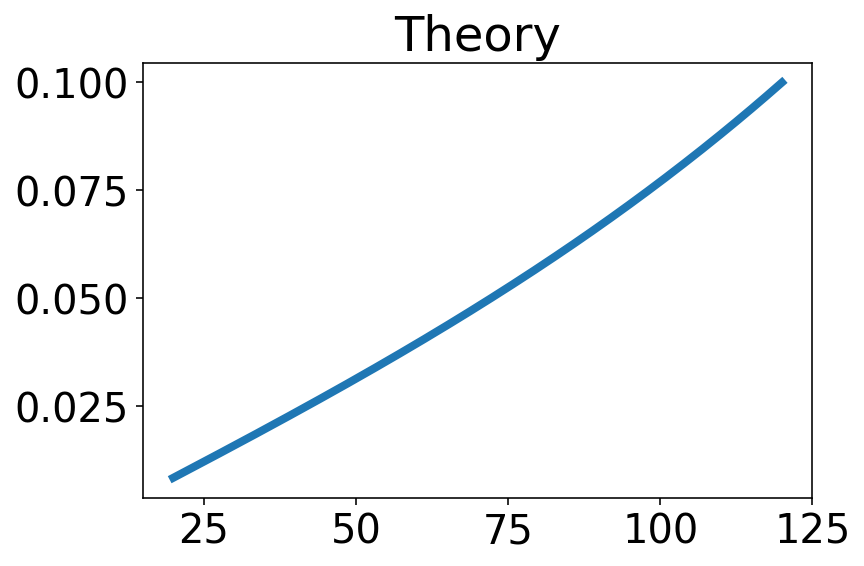

In [10]:
x = np.linspace(R, R + L, 200)

analytical_solution = (np.exp(L/xeta)*(-1 + 1/(np.tanh(L/xeta)))*(A*np.sinh(L/xeta) + 
                                                                  (A - cfar*k)*np.sinh((R - x)/xeta) + 
                                                                  (-A + cEqOut*k)*np.sinh((L + R - x)/xeta)))/k

plt.plot(x, analytical_solution, linewidth = 4)

plt.title('Theory')

Text(0, 0.5, '$-D \\nabla \\phi$')

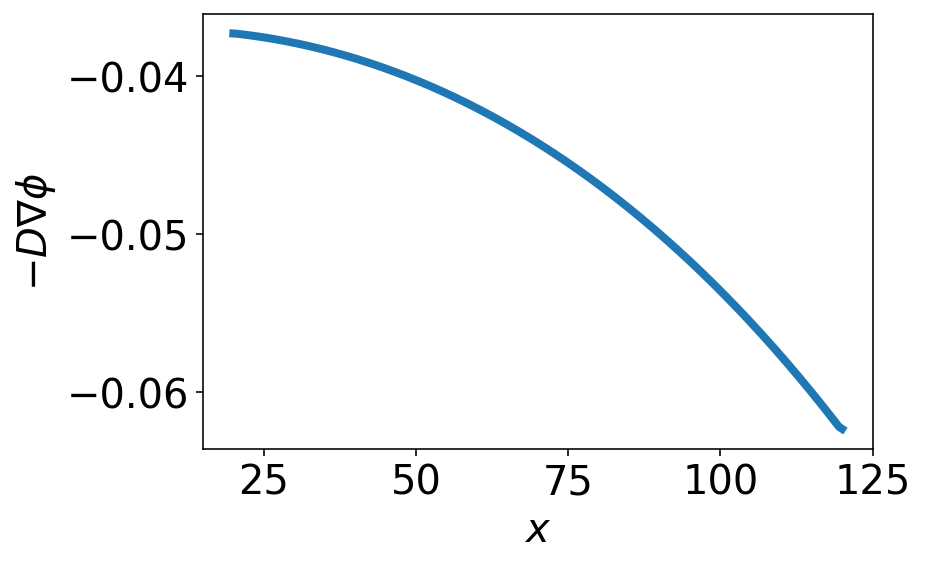

In [11]:
plt.plot(x, -D*np.gradient(analytical_solution), linewidth = 4)

plt.xlabel(r'$x$')

plt.ylabel(r'$-D \nabla \phi$')

In [ ]:
grid = pde.CartesianGrid([[R, R + L]], [100], periodic = [False])

field = pde.ScalarField.random_uniform(grid)

bcs = [{"value": cEqOut}, {"value": cfar}]

eq = phasesep.ReactionDiffusionPDE({'diffusivity': D, 'reaction_flux': f'{A} -({k}) * c', "bc": bcs})

# eq = phasesep.ReactionDiffusionPDE({'diffusivity': D, 'reaction_flux': None, "bc": bcs})

plot_tracker = pde.trackers.PlotTracker(interval = 2e2)

sol = eq.solve(field, t_range = 1e4, tracker = [plot_tracker]);

In [ ]:
plt.figure(figsize = (8, 6))

plt.plot(x, analytical_solution, linewidth = 4, label = 'Theory')

plt.plot(x, sol.data, linewidth = 4, label = 'Simulations')

plt.axhline(y = cEqOut, color = 'g', linestyle = '--', linewidth = 4, label = 'cEqOut')

plt.axhline(y = cfar, color = 'm', linestyle = '--', linewidth = 4, label = 'cFar')

plt.xlabel(r'$x$')

plt.ylabel(r'$\phi$')

plt.xlim(R, R + L)

plt.legend()